# Horse vs Human classification with CNN




In [1]:
import tensorflow as tf
import urllib
import zipfile
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img

from tensorflow.keras.optimizers import RMSprop

In [2]:
_TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
_TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')
local_zip = 'horse-or-human.zip'
training_dir = 'horse-or-human/training/'
test_dir = 'horse-or-human/test/'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(training_dir )
zip_ref.close()
urllib.request.urlretrieve(_TEST_URL, 'validation-horse-or-human.zip')
local_zip = 'validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(test_dir)
zip_ref.close()

In [3]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator( rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


  validation_datagen = ImageDataGenerator(rescale=1 / 255)

  train_generator = train_datagen.flow_from_directory(

    TRAINING_DIR,  
    target_size=(300, 300),  
    batch_size=128,
    class_mode='binary')

  validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR, 
    target_size=(300, 300),  
    batch_size=32,
    class_mode='binary'
  )
  return train_generator, validation_generator

In [4]:
train_generator, validation_generator = train_val_generators(training_dir, test_dir)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                              input_shape=(300, 300, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [11]:
model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy') > 0.8):
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()


In [13]:
history= model.fit(train_generator,
          steps_per_epoch=8,
          epochs=30,
          verbose=1,
          validation_data=validation_generator,
          validation_steps=8, callbacks=callbacks
          )

Epoch 1/30
8/8 [==============================] - 107s 13s/step - loss: 0.6897 - accuracy: 0.5293 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 97s 12s/step - loss: 0.6722 - accuracy: 0.5584 - val_loss: 0.6720 - val_accuracy: 0.6211
Epoch 3/30
8/8 [==============================] - 97s 12s/step - loss: 0.6661 - accuracy: 0.6418 - val_loss: 0.6546 - val_accuracy: 0.7227
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6587 - accuracy: 0.6073 
Reached 80% accuracy so cancelling training!
8/8 [==============================] - 98s 12s/step - loss: 0.6587 - accuracy: 0.6073 - val_loss: 0.6450 - val_accuracy: 0.8008


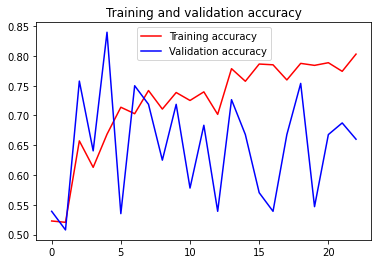

<Figure size 432x288 with 0 Axes>

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()